In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
import seaborn as sns


In [69]:

df=pd.read_csv('dementia_dataset.csv')


In [70]:
df.shape

(373, 15)

In [71]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [72]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [74]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [75]:
df["SES"].value_counts()

SES
2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: count, dtype: int64

In [76]:
df['SES'].fillna(2.0,inplace=True)

In [77]:
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)

In [78]:
df=df.rename(columns={'M/F':'Gender'})

In [79]:
df['Gender'].unique()


array(['M', 'F'], dtype=object)

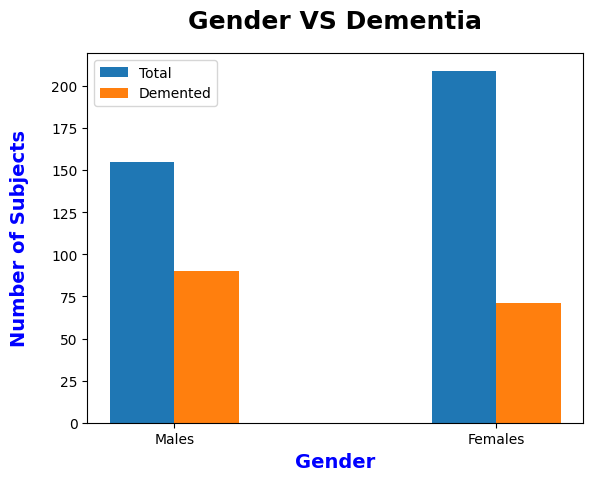

In [100]:
males_total  = len(df[df['Gender'] == 'M'])
females_total = len(df[df['Gender'] == 'F'])
males_demented = len(df[ (df['Gender'] == 'M')   &  (df['Group'] != "Nondemented")  ])
females_demented = len(df[ (df['Gender'] == 'F')   &  (df['Group'] != "Nondemented")  ])
tot = []
tot.append(males_total)
tot.append(females_total)
tot

dem = []
dem.append(males_demented)
dem.append(females_demented)
n = 2
X_axis = np.arange(n)
X = ['Males' , 'Females']

plt.bar(X_axis - 0.1   , tot , label = 'Total' , width = 0.2)
plt.bar(X_axis + 0.1 , dem , label = 'Demented' , width = 0.2)

plt.xticks(X_axis , X)
plt.xlabel("Gender" , color = "blue" , fontweight = "bold" , fontsize = 14)
plt.ylabel("Number of Subjects" , color = "blue" , fontweight = "bold" , fontsize = 14 , labelpad = 16)
plt.title("Gender VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.legend()
plt.show()


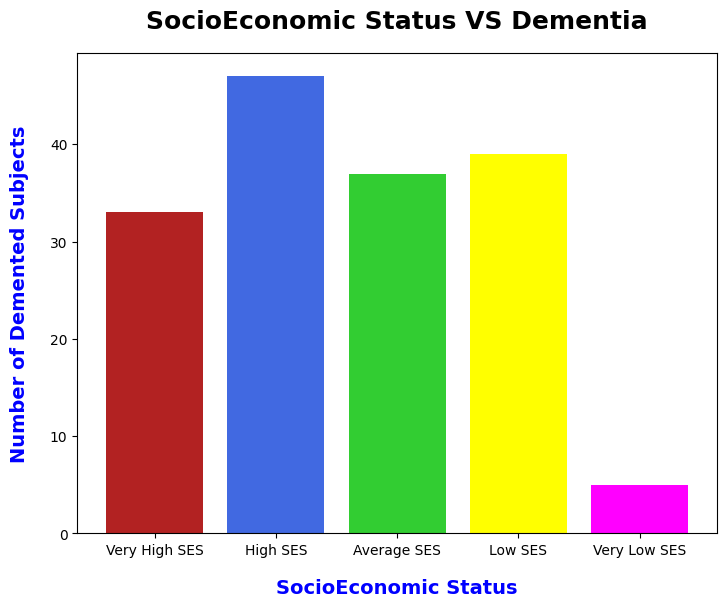

In [101]:
ses_cat = df['SES'].unique()
ses_cat.sort()
ses_cat
    
ses_dem = []

for i in ses_cat : 
    ses_dem.append(len( df[ (df['SES'] == i) & (df['Group'] != "Nondemented") ] ))
ses_dem

fig = plt.figure()
X = ['Very High SES' , 'High SES' , 'Average SES' , 'Low SES' , 'Very Low SES']
ax = fig.add_axes([0,0,1,1])
ax.bar(X , ses_dem , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('SocioEconomic Status' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Number of Demented Subjects' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("SocioEconomic Status VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()


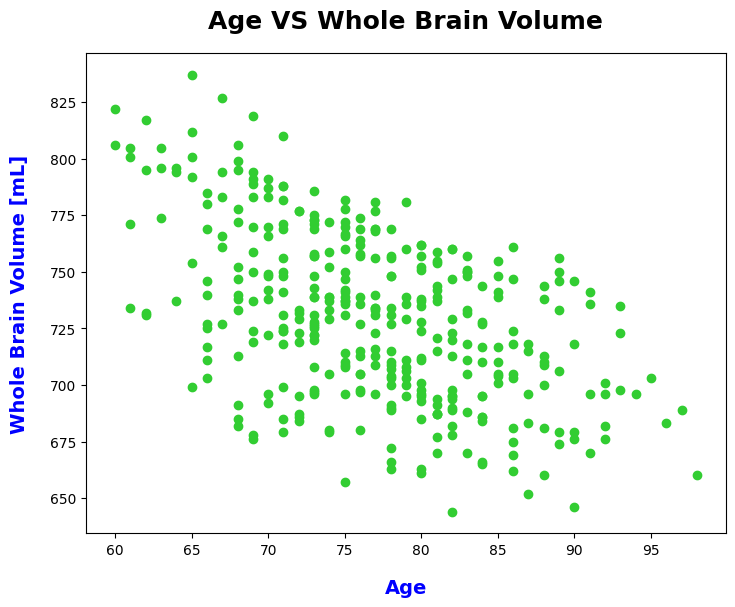

In [102]:
age = df['Age']
norm_brain = df['nWBV']
norm_brain = norm_brain*1000
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(age,norm_brain , color = 'limegreen')
ax.set_xlabel('Age' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Whole Brain Volume [mL]' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title('Age VS Whole Brain Volume' , fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()


In [103]:
cdr = df['CDR'].unique()
cdr

array([0. , 0.5, 1. , 2. ])

In [104]:
cdr_dem = []
cdr_tot = []
for i in cdr :
    cdr_dem.append(len(df[ (df['CDR'] == i)  &  (df['Group'] != 'Nondemented') ]))
    cdr_tot.append(len(df[df['CDR'] == i]))


In [105]:
cdr_perc = []
for i in range(4) : 
    cdr_perc.append( round(  ((cdr_dem[i] / cdr_tot[i])*100) , 2 ) ) 


cdr_perc 

[0.99, 97.46, 100.0, 100.0]

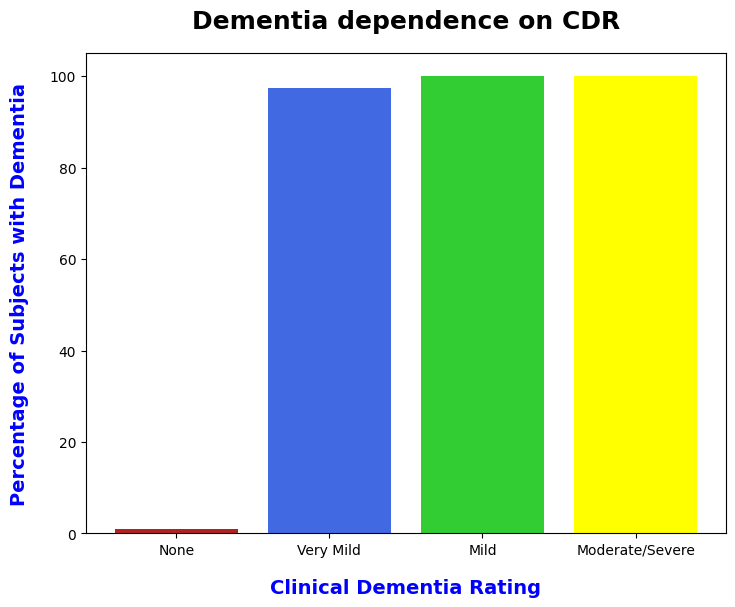

In [106]:
X = ['None' , 'Very Mild' , 'Mild' , 'Moderate/Severe']

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(X , cdr_perc , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('Clinical Dementia Rating' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Percentage of Subjects with Dementia' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("Dementia dependence on CDR", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()


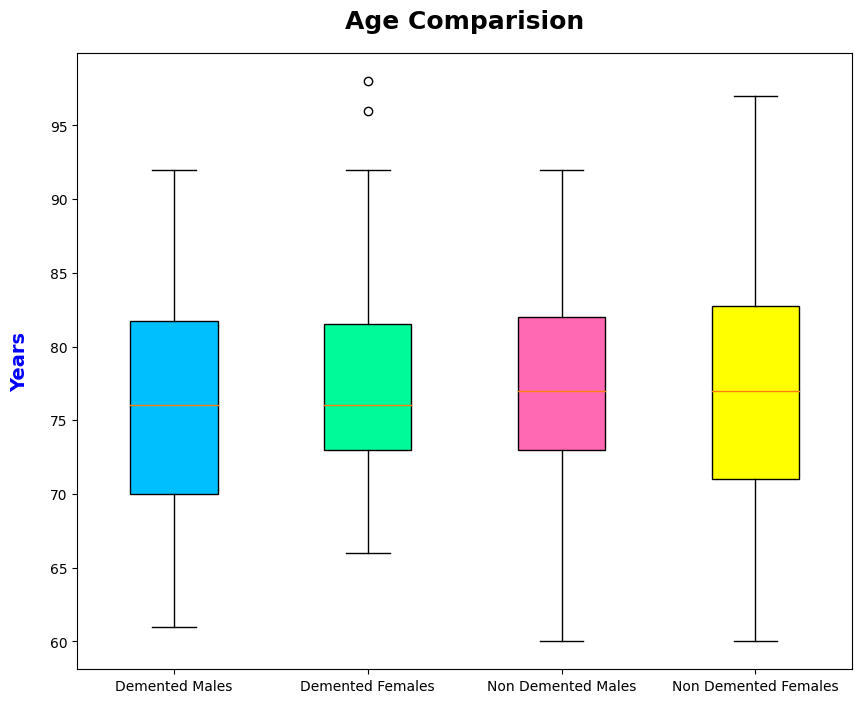

In [107]:
m_dem = df.Age[((df['Group'] != "Nondemented") & (df['Gender'] == "M"))]
f_dem = df.Age[ (df['Group'] != "Nondemented") & (df['Gender'] == "F")]
m_nondem = df.Age[ (df['Group'] == "Nondemented") & (df['Gender'] == "M")]
f_nondem = df.Age[ (df['Group'] == "Nondemented") & (df['Gender'] == "F")]
plot_data = [m_dem , f_dem , m_nondem , f_nondem]
lab = ["Demented Males" , "Demented Females" , "Non Demented Males" , "Non Demented Females"]
plt.figure(figsize = (10,8))
colors = ['deepskyblue' , 'mediumspringgreen' , 'hotpink' , 'yellow']
bplot = plt.boxplot(plot_data , labels = lab , patch_artist = True )


    
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Age Comparision", fontweight = "bold" , fontsize = 18 , pad = 18)

plt.ylabel('Years' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)

plt.show()


In [108]:
df['Hand'] = df['Hand'].replace(['R','L'], [0,1])

In [109]:
df

,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia,Prediction
0,Nondemented,1,0,M,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,False
1,Nondemented,2,457,M,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,False
2,Demented,1,0,M,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,True,True
3,Demented,2,560,M,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,True,True
4,Demented,3,1895,M,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,0,82,16,1.0,28.0,0.5,1693,0.694,1.037,True,True
369,Demented,3,2297,M,0,86,16,1.0,26.0,0.5,1688,0.675,1.040,True,True
370,Nondemented,1,0,F,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,False,False
371,Nondemented,2,763,F,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,False,False


In [110]:
df['Gender'] = df['Gender'].replace(['F','M'], [0,1])
df

,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia,Prediction
0,Nondemented,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,False
1,Nondemented,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,False
2,Demented,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,True,True
3,Demented,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,True,True
4,Demented,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037,True,True
369,Demented,3,2297,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040,True,True
370,Nondemented,1,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,False,False
371,Nondemented,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,False,False


In [82]:
#from pandas import set_option
#set_option('precision', 3)
#df.describe()

In [83]:
# plt.figure(figsize=(8,8))
# df.corr()

In [111]:
dementia=df[['eTIV','nWBV','ASF','CDR','Group']]
df.head()

,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia,Prediction
0,Nondemented,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,False
1,Nondemented,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,False
2,Demented,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,True,True
3,Demented,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,True,True
4,Demented,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,True,True


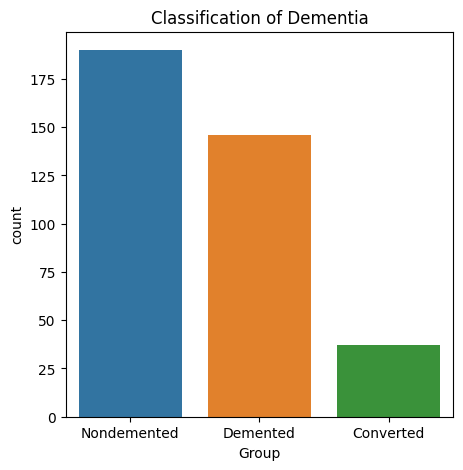

In [85]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Group')
plt.title("Classification of Dementia")
plt.show()

In [86]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [87]:
df.loc[df.Group =='Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [88]:
nondemented=[33,36,57,81,114,194,218,245,261,271,295,297,346]
demented=[35,38,59,83,115,195,220,246,265,272,274,296,298,348]
drop=[34,37,58,82,219,262,263,264,347]

In [89]:
for n in nondemented:
    df.Group.iloc[n]='Nondemented'
for n in demented:
    df.Group.iloc[n]='Demented'

df=df.drop(index=[34,37,58,82,219,262,263,264,347])


C:\Users\user\AppData\Local\Temp\ipykernel_5260\584800711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Group.iloc[n]='Nondemented'
C:\Users\user\AppData\Local\Temp\ipykernel_5260\584800711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Group.iloc[n]='Nondemented'
C:\Users\user\AppData\Local\Temp\ipykernel_5260\584800711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Group.iloc[n]='Nondemented'
C:\Users\user\Ap

In [90]:
df['Dementia']=df.Group =='Demented'
df=df.drop(columns=['Subject ID','MRI ID'])


In [91]:
df.head()

,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,False
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,False
2,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,True
3,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,True
4,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,True


In [92]:
# sns.pairplot(df,hue='Group',size=2)

<Axes: xlabel='Dementia', ylabel='count'>

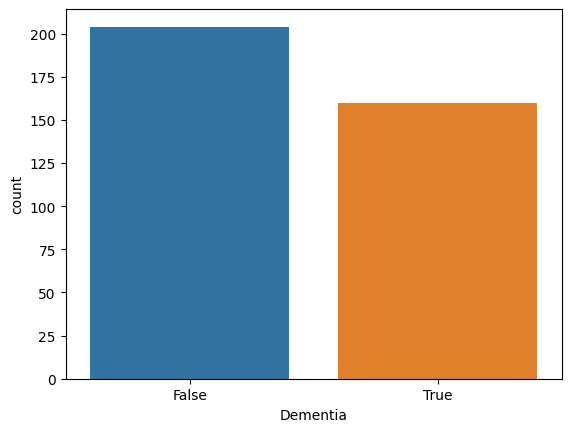

In [93]:
sns.countplot(data=df,x='Dementia')

In [94]:
df.Dementia.value_counts()

Dementia
False    204
True     160
Name: count, dtype: int64

In [96]:
#df.corr()['Dementia'].sort_values(ascending=False)

In [97]:
df.groupby('Dementia')['CDR'].value_counts()

Dementia  CDR
False     0.0    201
          0.5      3
True      0.5    115
          1.0     41
          2.0      3
          0.0      1
Name: count, dtype: int64

In [98]:
df['Prediction']=df.CDR != 0

In [ ]:
df.head()

,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia,Prediction
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,False
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,False
2,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,True,True
3,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,True,True
4,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,True,True


In [1]:
df.tail(10)

NameError: name 'df' is not defined